In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

lr = LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 
lda = LinearDiscriminantAnalysis(solver='svd')
qda = QuadraticDiscriminantAnalysis()

%matplotlib inline

In [3]:
df = pd.read_csv('ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [4]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0: 
        Methane_bin.append(int(1))
    else:
        Methane_bin.append(int(0))
for i in df['Ethylene']:
    if i > 0.0: 
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin

In [4]:
df.head()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,...,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49,0,0
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,...,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03,0,0
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,...,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24,0,0
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,...,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84,0,0
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,...,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59,0,0


In [5]:
df.describe()

,Time,Methane,Ethylene,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,Methane Bin,Ethylene Bin
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,...,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,...,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03,4.426828e-01,4.314846e-01
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,...,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02,4.967039e-01,4.952834e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,...,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02,0.000000e+00,0.000000e+00
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,...,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03,0.000000e+00,0.000000e+00
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,...,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03,0.000000e+00,0.000000e+00
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,...,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03,1.000000e+00,1.000000e+00
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,...,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 21 columns):
Time            float64
Methane         float64
Ethylene        float64
1               float64
2               float64
3               float64
4               float64
5               float64
6               float64
7               float64
8               float64
9               float64
10              float64
11              float64
12              float64
13              float64
14              float64
15              float64
16              float64
Methane Bin     int64
Ethylene Bin    int64
dtypes: float64(19), int64(2)
memory usage: 669.5 MB


Text(0, 0.5, 'Observations')

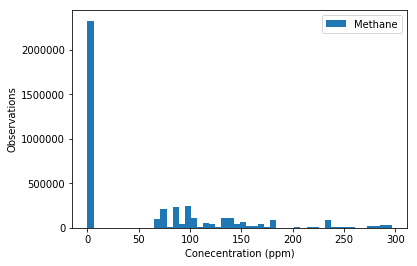

In [7]:
plt.hist(df.Methane,50,label="Methane")
plt.legend(loc='upper right')
plt.xlabel("Conecentration (ppm)")
plt.ylabel("Observations")

Text(0, 0.5, 'Observations')

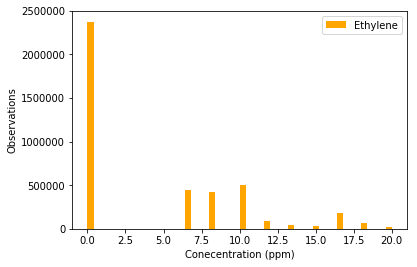

In [16]:
plt.hist(df.Ethylene,50,label="Ethylene", color='orange')
plt.legend(loc='upper right')
plt.xlabel("Conecentration (ppm)")
plt.ylabel("Observations")

Text(0, 0.5, 'Observations')

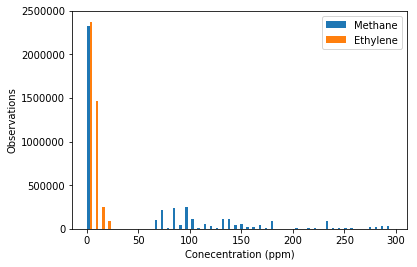

In [17]:
plt.hist([df.Methane, df.Ethylene],50,label=["Methane", "Ethylene"])
plt.legend(loc='upper right')
plt.xlabel("Conecentration (ppm)")
plt.ylabel("Observations")


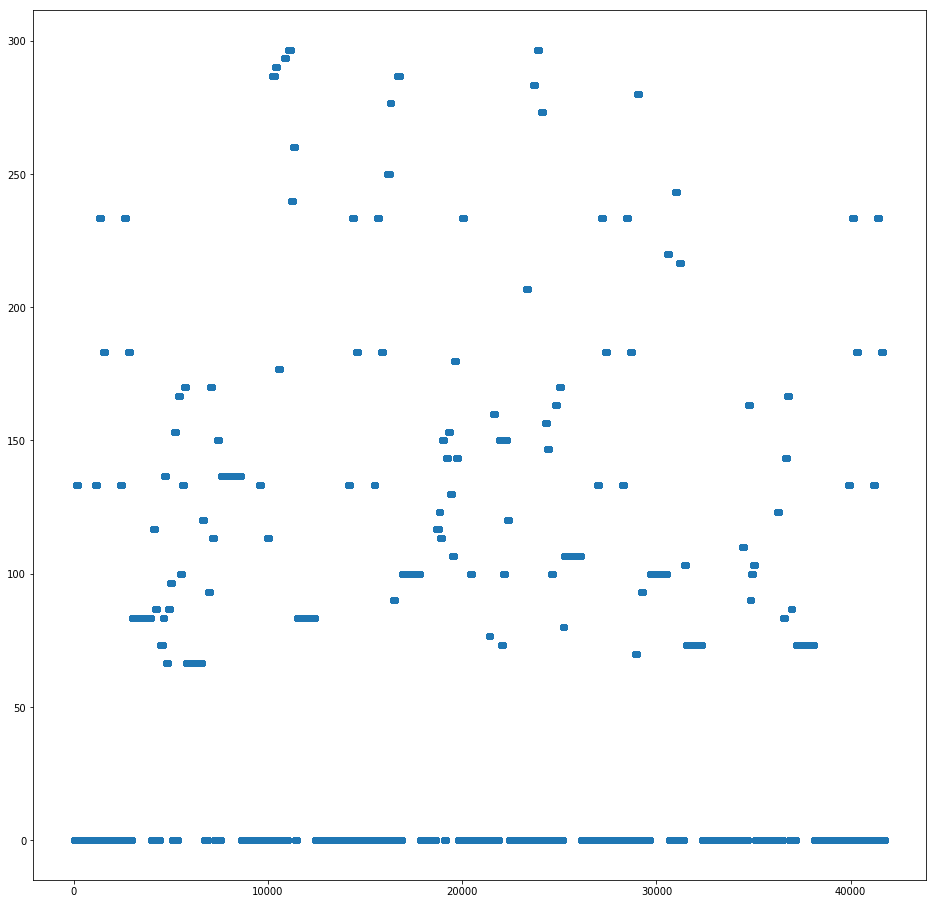

In [18]:
%matplotlib inline
plt.figure(figsize=(16,16))
plt.scatter(df['Time'],df['Methane'])

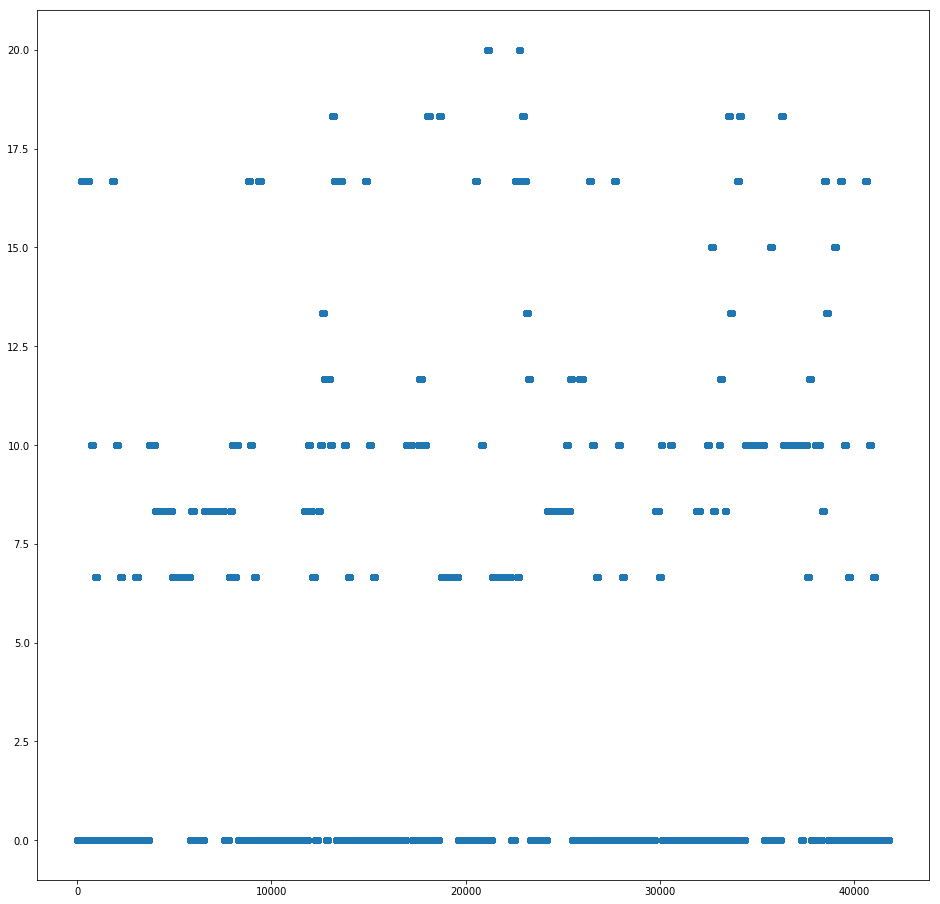

In [19]:
plt.figure(figsize=(16,16))
plt.scatter(df['Time'],df['Ethylene'])

(40000, 43879.6995)

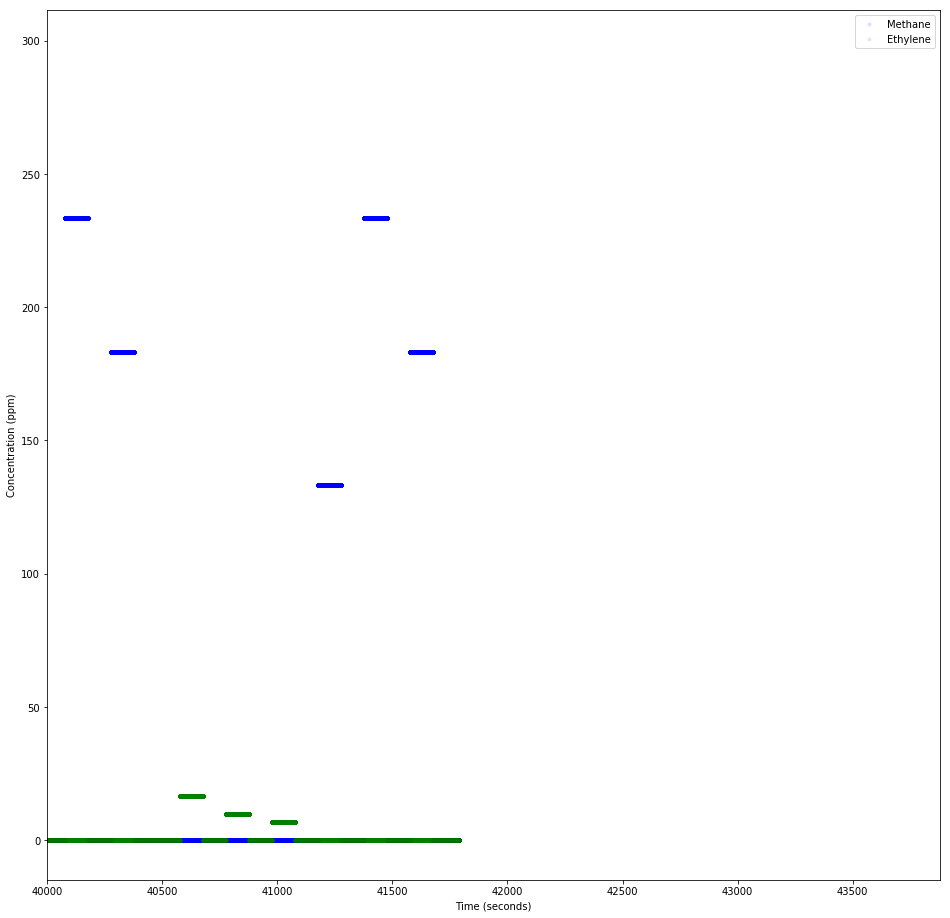

In [7]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'],df['Methane'], '.b',alpha=.1, label='Methane')
plt.plot(df['Time'],df['Ethylene'],'.g',alpha=.1, label='Ethylene')
plt.xlabel("Time (seconds)")
plt.ylabel("Concentration (ppm)")
plt.legend(labels=['Methane', 'Ethylene'], loc="upper right")
plt.xlim(40000, )

In [7]:
meth=df['1']
meth=meth[:100000]
t=df['Time']
t=t[:100000]

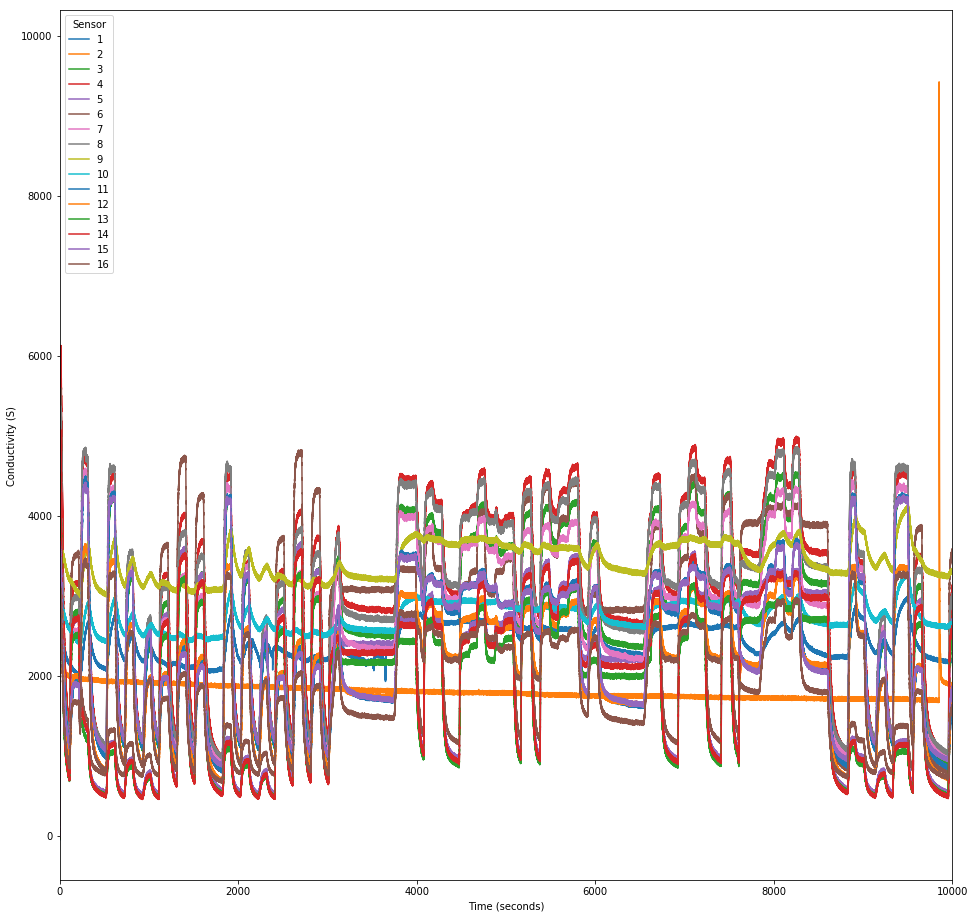

In [22]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['1'])
plt.plot(df['Time'], df['2'])
plt.plot(df['Time'], df['3'])
plt.plot(df['Time'], df['4'])
plt.plot(df['Time'], df['5'])
plt.plot(df['Time'], df['6'])
plt.plot(df['Time'], df['7'])
plt.plot(df['Time'], df['8'])
plt.plot(df['Time'], df['9'])
plt.plot(df['Time'], df['10'])
plt.plot(df['Time'], df['11'])
plt.plot(df['Time'], df['12'])
plt.plot(df['Time'], df['13'])
plt.plot(df['Time'], df['14'])
plt.plot(df['Time'], df['15'])
plt.plot(df['Time'], df['16'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")

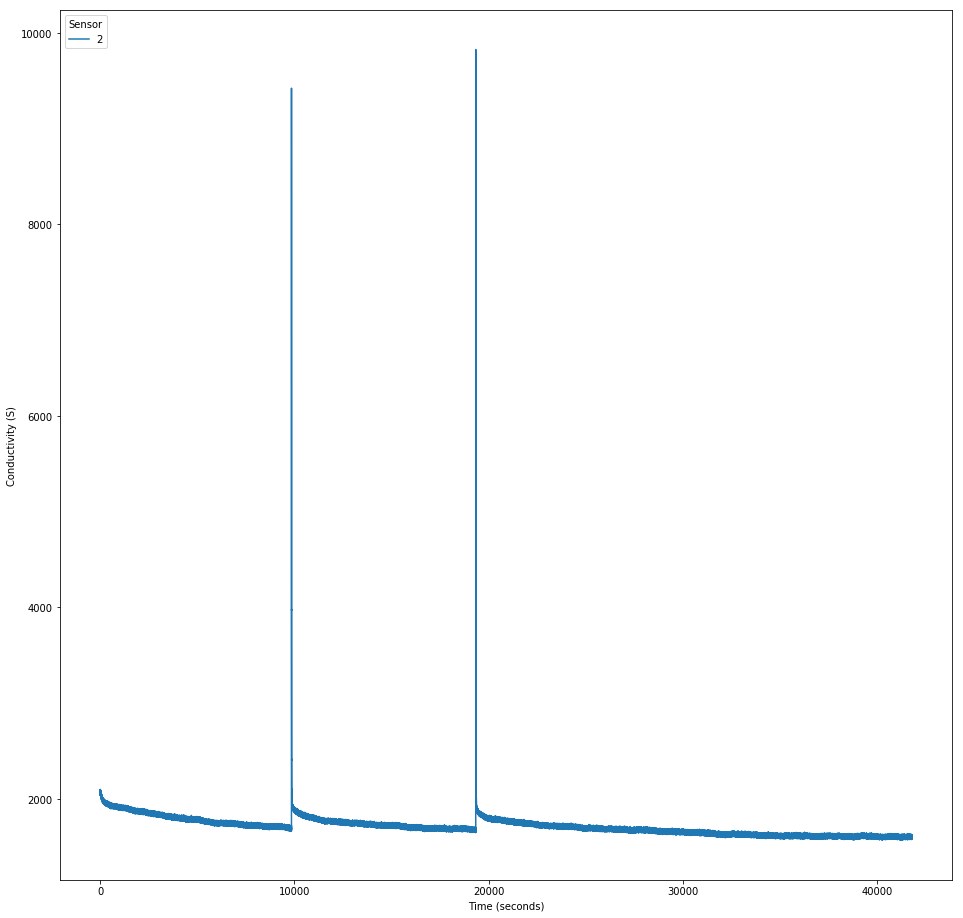

In [30]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['2'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title ="Sensor")

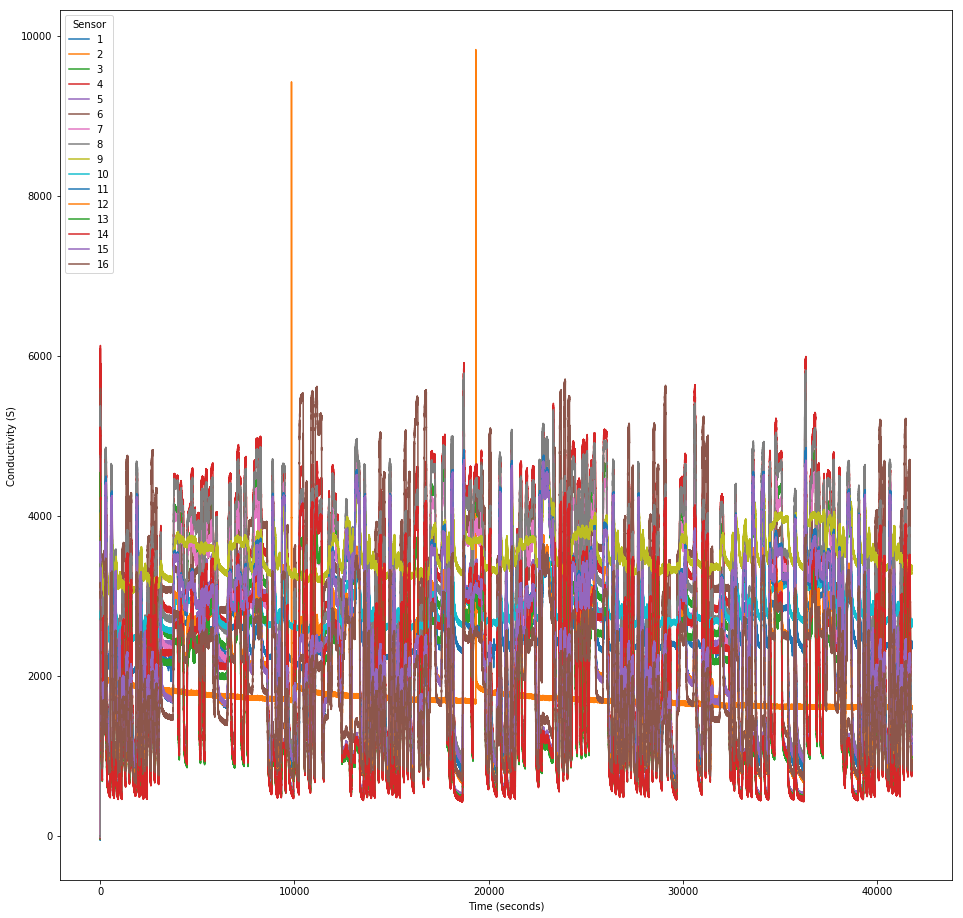

In [31]:

plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['1'])
plt.plot(df['Time'], df['2'])
plt.plot(df['Time'], df['3'])
plt.plot(df['Time'], df['4'])
plt.plot(df['Time'], df['5'])
plt.plot(df['Time'], df['6'])
plt.plot(df['Time'], df['7'])
plt.plot(df['Time'], df['8'])
plt.plot(df['Time'], df['9'])
plt.plot(df['Time'], df['10'])
plt.plot(df['Time'], df['11'])
plt.plot(df['Time'], df['12'])
plt.plot(df['Time'], df['13'])
plt.plot(df['Time'], df['14'])
plt.plot(df['Time'], df['15'])
plt.plot(df['Time'], df['16'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title ="Sensor")

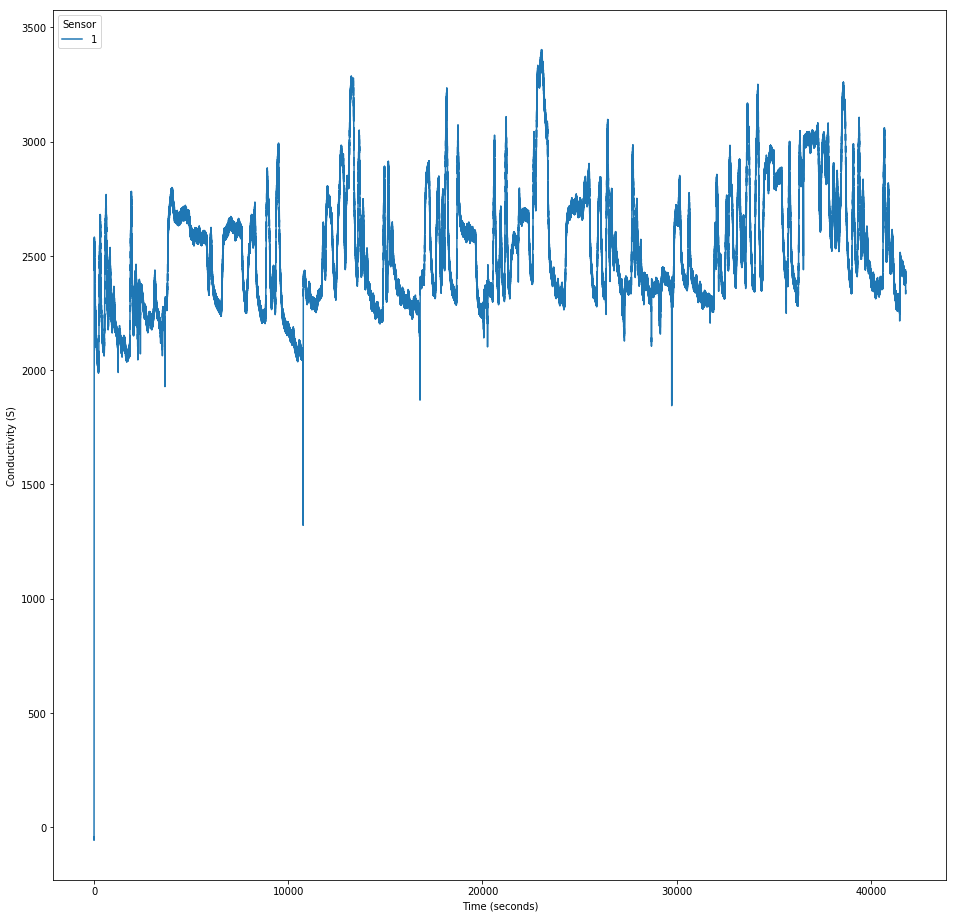

In [51]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['1'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.legend(loc='upper left', title ="Sensor")

Text(0.5, 0.98, 'TGS2602 Sensors')

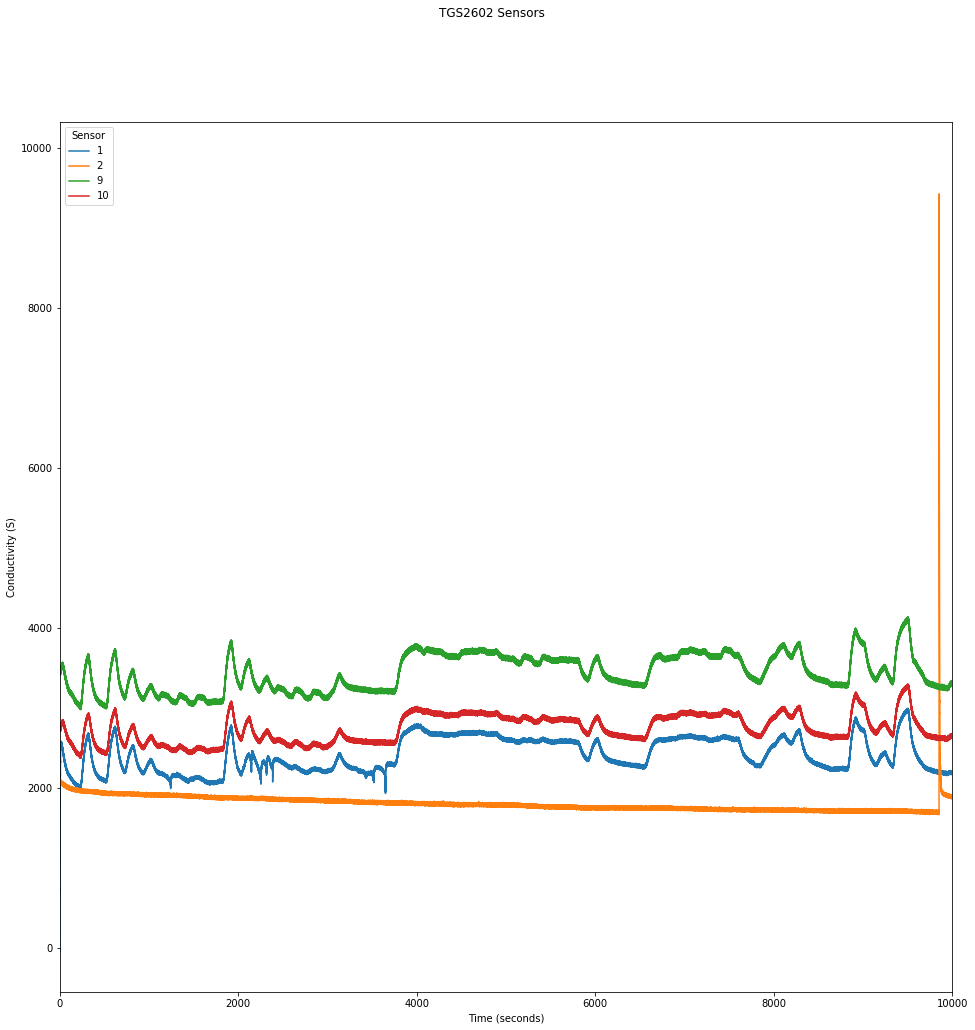

In [221]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['1'])
plt.plot(df['Time'], df['2'])
plt.plot(df['Time'], df['9'])
plt.plot(df['Time'], df['10'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")
plt.suptitle("TGS2602 Sensors")

Text(0.5, 0.98, 'TGS2600 Sensors')

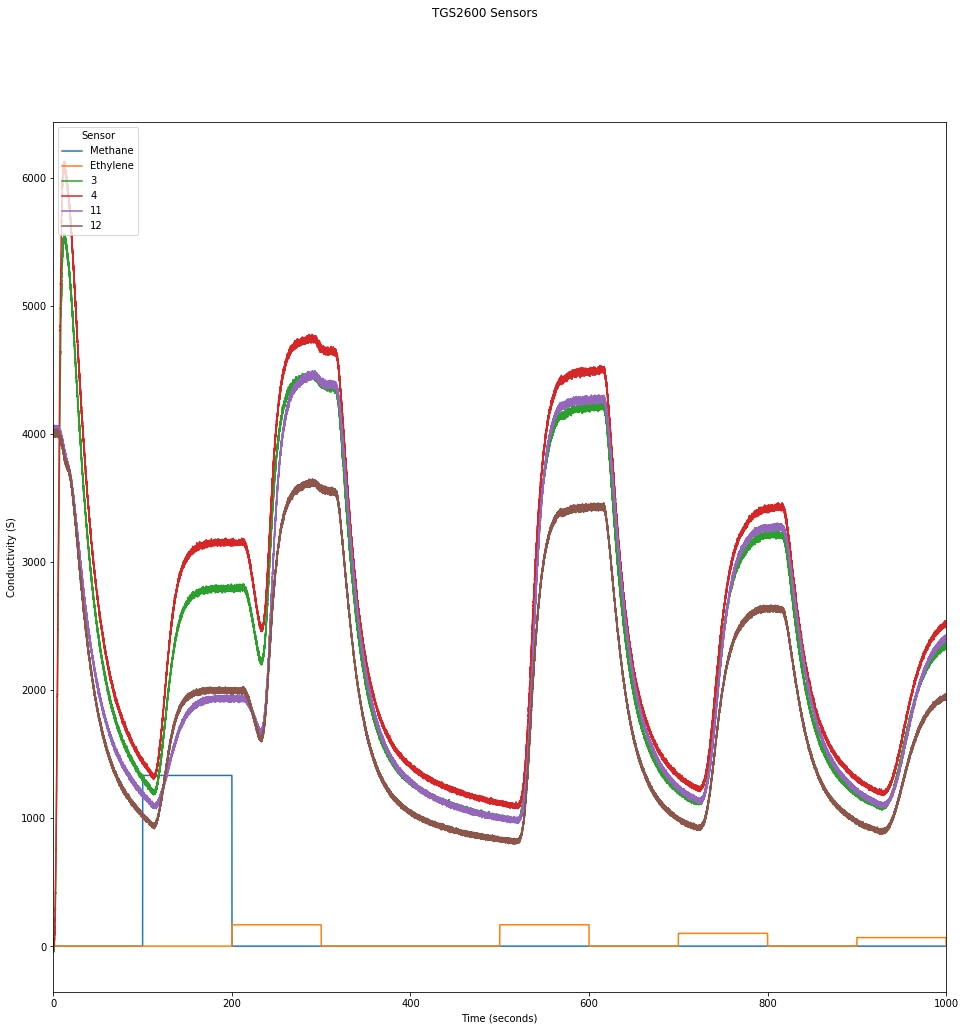

In [23]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], 10*df['Methane'])
plt.plot(df['Time'], 10*df['Ethylene'])
plt.plot(df['Time'], df['3'])
plt.plot(df['Time'], df['4'])
plt.plot(df['Time'], df['11'])
plt.plot(df['Time'], df['12'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left', title ="Sensor")
plt.suptitle("TGS2600 Sensors")

Text(0.5, 0.98, 'TGS2610 Sensors')

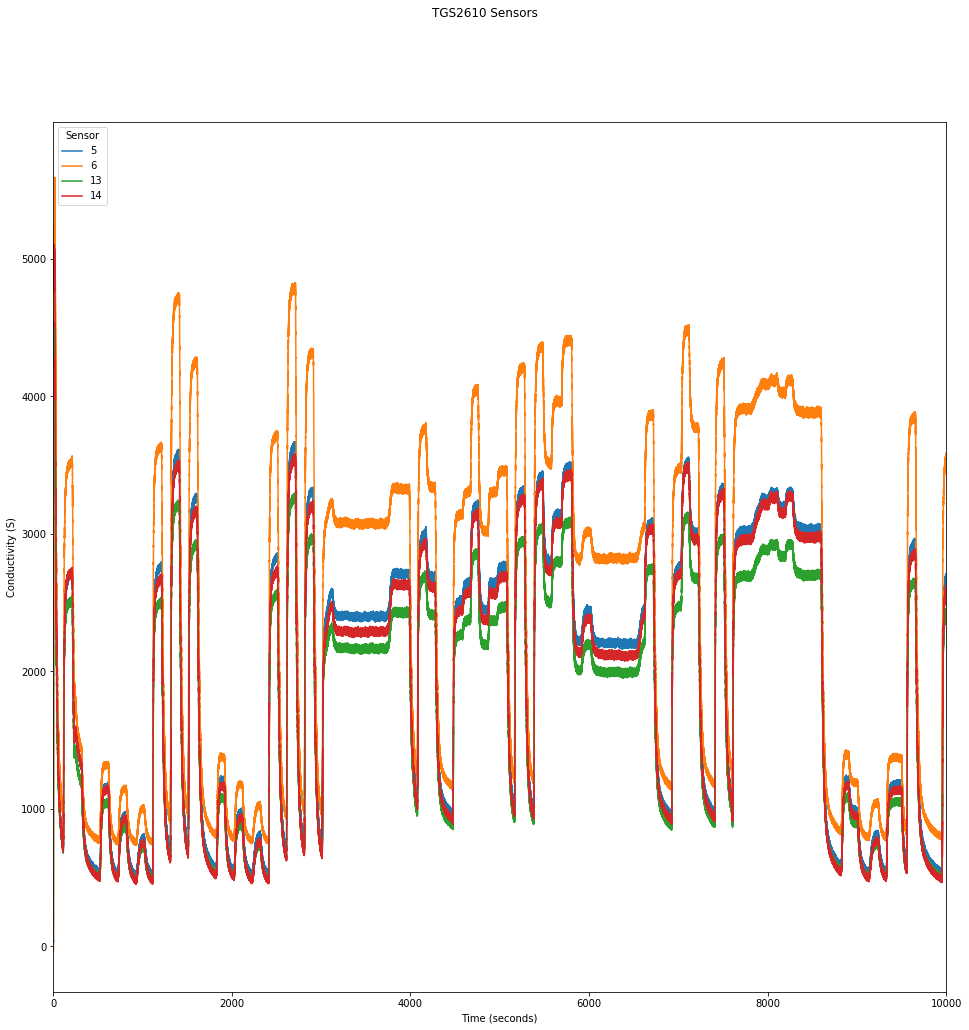

In [223]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['5'])
plt.plot(df['Time'], df['6'])
plt.plot(df['Time'], df['13'])
plt.plot(df['Time'], df['14'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")
plt.suptitle("TGS2610 Sensors")

Text(0.5, 0.98, 'TGS2620 Sensors')

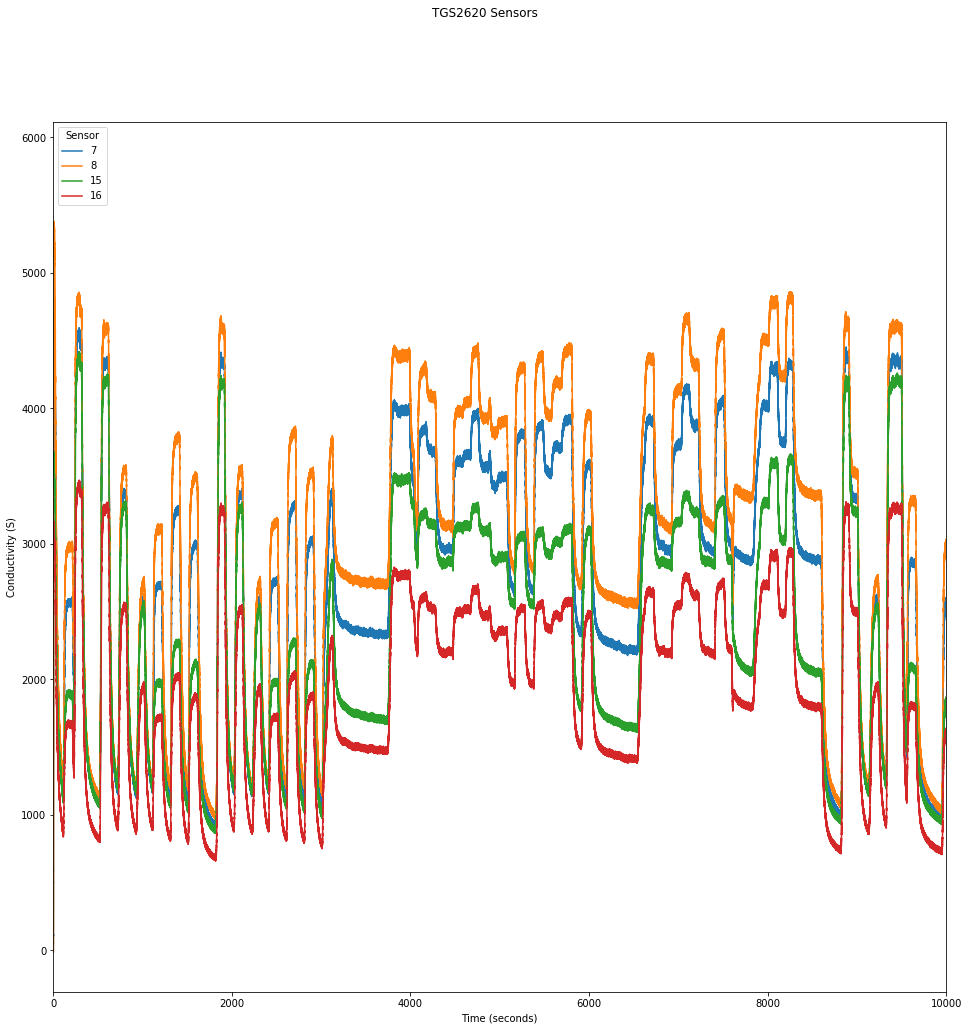

In [281]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['7'])
plt.plot(df['Time'], df['8'])
plt.plot(df['Time'], df['15'])
plt.plot(df['Time'], df['16'])
plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
plt.axis(xmin=0, xmax=10000)
plt.legend(loc='upper left', title ="Sensor")
plt.suptitle("TGS2620 Sensors")

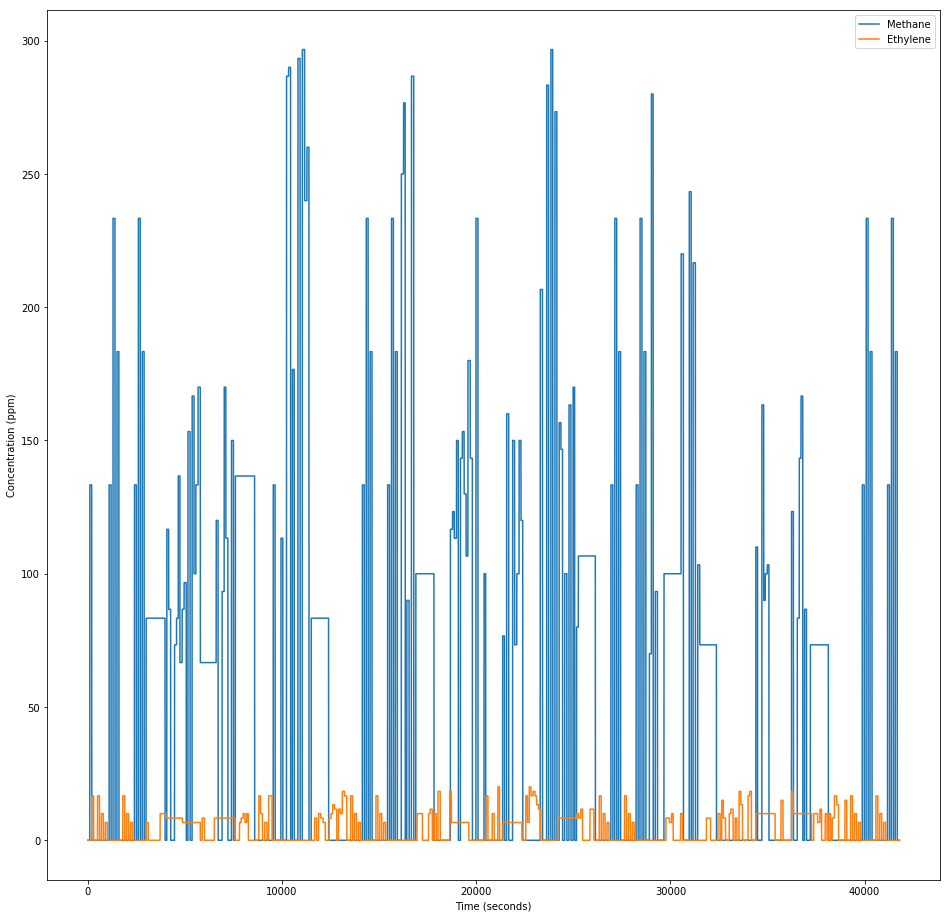

In [10]:
#Methane and Ethylene input

plt.figure(figsize=(16,16))
plt.plot(df['Time'], df['Methane'])
plt.plot(df['Time'], df['Ethylene'])
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration (ppm)')
plt.legend(loc='upper right')


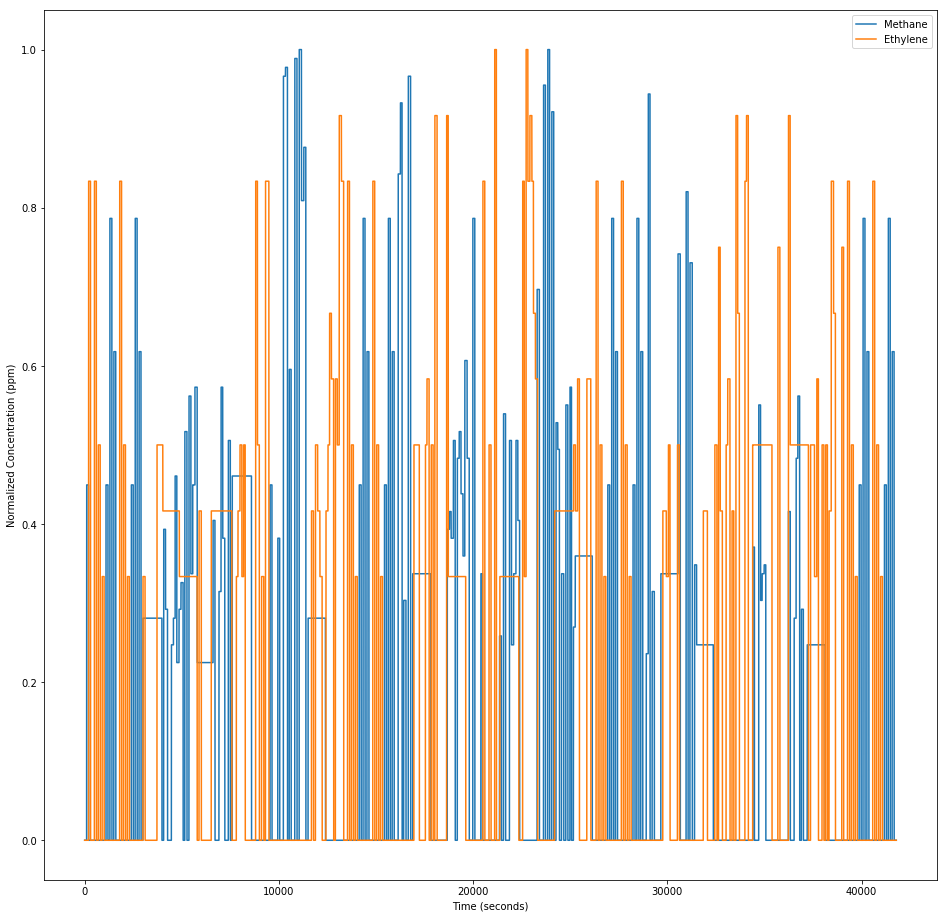

In [15]:
h = np.asarray(df['Methane']).reshape(-1,1)
g = np.asarray(df['Ethylene']).reshape(-1,1)
e= np.concatenate((h,g), axis=1)

scaled_data = MinMaxScaler().fit_transform(e)
plt.figure(figsize=(16,16))
plt.plot(df['Time'], scaled_data[:,0], label = 'Methane')
plt.plot(df['Time'], scaled_data[:,1], label = 'Ethylene')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (ppm)')
plt.legend(loc='upper right')



(0, 10000, -0.05, 1.05)

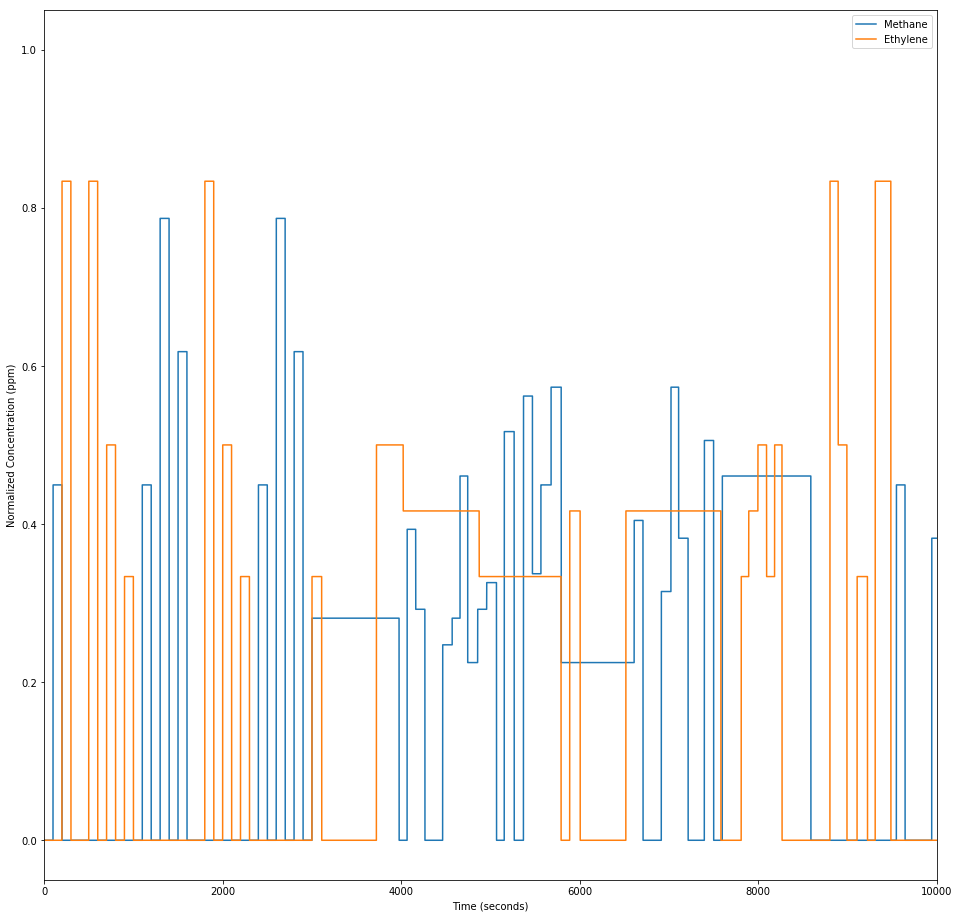

In [19]:
plt.figure(figsize=(16,16))
plt.plot(df['Time'], scaled_data[:,0], label = 'Methane')
plt.plot(df['Time'], scaled_data[:,1], label = 'Ethylene')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized Concentration (ppm)')
plt.legend(loc='upper right', )
plt.axis(xmin=0, xmax=10000)

<br>
<br>
<br>
<br>
<br>
<br>
<br>


**50/50 Split**

In [8]:
x1 = df[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y1_meth = df['Methane Bin']
y2_ethy = df['Ethylene Bin']


x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1_meth, test_size=0.50, random_state=42)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x1, y2_ethy, test_size=0.50, random_state=42)

<br>
<br>


**LDA 50/50**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd')

ytest_pred_lda = lda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
ytest_pred_lda2 = lda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

<br>

Methane LDA model Stats

In [11]:
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report, precision_score

scor1 = sm.accuracy_score(y_test_1, ytest_pred_lda)
print("Methane Accuracy = {}".format(scor1))

print("\n")
print("Methane LDA model Classification Report")
print(classification_report(y_test_1, ytest_pred_lda, target_names=['Methane', 'No Methane']))

print("\n")
print("LDA Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': ytest_pred_lda})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane Accuracy = 0.9330525948999929


Methane LDA model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.93      0.94   1165323
  No Methane       0.91      0.94      0.93    923929

   micro avg       0.93      0.93      0.93   2089252
   macro avg       0.93      0.93      0.93   2089252
weighted avg       0.93      0.93      0.93   2089252



LDA Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1084780,59327
Yes,80543,864602


<br>

Ethylene Model Stats

In [115]:
scor2 = sm.accuracy_score(y_test_2, ytest_pred_lda2)
print("Ethylene Accuracy = {}".format(scor2))

print("\n")
print("Ethylene LDA model Classification Report")
print(classification_report(y_test_2, ytest_pred_lda2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("LDA Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': ytest_pred_lda2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')



Ethylene Accuracy = 0.9049099869235496


Ethylene LDA model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.90      0.94      0.92   1188213
 No Ethylene       0.91      0.86      0.89    901039

   micro avg       0.90      0.90      0.90   2089252
   macro avg       0.91      0.90      0.90   2089252
weighted avg       0.91      0.90      0.90   2089252



LDA Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1114662,125116
Yes,73551,775923


<br>
<br>
<br>
<br>

**QDA 50/50**

In [116]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

y_pred_qda1 = qda.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)
y_pred_qda2 = qda.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values)

<br>

Methane QDA Model Stats

In [117]:
qda_scor1 = sm.accuracy_score(y_test_1, y_pred_qda1)
print("Methane QDA model Accuracy = {}".format(qda_scor1))

print("\n")
print("Methane QDA model Classification Report")
print(classification_report(y_test_1, y_pred_qda1, target_names=['Methane', 'No Methane']))

print("\n")
print("QDA Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': y_pred_qda1})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane QDA model Accuracy = 0.9222793612259316


Methane QDA model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.91      0.93   1165323
  No Methane       0.89      0.94      0.91    923929

   micro avg       0.92      0.92      0.92   2089252
   macro avg       0.92      0.92      0.92   2089252
weighted avg       0.92      0.92      0.92   2089252



QDA Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1062477,59532
Yes,102846,864397


<br>

Ethylene QDA Model Stats

In [118]:
qda_scor2 = sm.accuracy_score(y_test_2, y_pred_qda2)
print("Ethylene QDA model Accuracy = {}".format(qda_scor2))

print("\n")
print("Ethylene QDA model Classification Report")
print(classification_report(y_test_2, y_pred_qda2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("QDA Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': y_pred_qda2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')

Ethylene QDA model Accuracy = 0.8740788569306144


Ethylene QDA model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.90      0.88      0.89   1188213
 No Ethylene       0.84      0.87      0.86    901039

   micro avg       0.87      0.87      0.87   2089252
   macro avg       0.87      0.87      0.87   2089252
weighted avg       0.88      0.87      0.87   2089252



QDA Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1039990,114858
Yes,148223,786181


<br>
<br>
<br>
<br>


**Logistic Regression 50/50**

In [27]:
import sklearn.linear_model as sk_lm
lr = sk_lm.LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 

#Methane Fit
y_pred_lr1 = lr.fit(x_train_1.values, y_train_1.values).predict(x_test_1.values)  

/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [28]:
#Ethylene Fit
y_pred_lr2 = lr.fit(x_train_2.values, y_train_2.values).predict(x_test_2.values) 

/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


<br>
Methane Logistic Regression Model Stats

In [35]:
lr_scor1 = sm.accuracy_score(y_test_1, y_pred_lr1)
print("Methane Logistic Regression model Accuracy = {}".format(lr_scor1))

print("\n")
print("Methane Logistic Regression model Classification Report")
print(classification_report(y_test_1, y_pred_lr1, target_names=['Methane', 'No Methane']))

print("\n")
print("Logistic Regression Methane Confusion Matrix")
df3=pd.DataFrame({'True': y_test_1,
                    'Predicted': y_pred_lr1})
df3.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df3.groupby(['Predicted','True']).size().unstack('True')

Methane Logistic Regression model Accuracy = 0.9403087803673277


Methane Logistic Regression model Classification Report
              precision    recall  f1-score   support

     Methane       0.95      0.94      0.95   1165323
  No Methane       0.93      0.94      0.93    923929

   micro avg       0.94      0.94      0.94   2089252
   macro avg       0.94      0.94      0.94   2089252
weighted avg       0.94      0.94      0.94   2089252



Logistic Regression Methane Confusion Matrix


True,No,Yes
Predicted,,
No,1099987,59374
Yes,65336,864555


<br>
Ethylene Logistic Regression Model Stats

In [36]:
lr_scor2 = sm.accuracy_score(y_test_2, y_pred_lr2)
print("Ethylene Logistic Regression model Accuracy = {}".format(lr_scor2))

print("\n")
print("Ethylene Logistic Regression model Classification Report")
print(classification_report(y_test_2, y_pred_lr2, target_names=['Ethylene', 'No Ethylene']))

print("\n")
print("Logistic Regression Ethylene Confusion Matrix")
df4=pd.DataFrame({'True': y_test_2,
                    'Predicted': y_pred_lr2})
df4.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df4.groupby(['Predicted','True']).size().unstack('True')

Ethylene Logistic Regression model Accuracy = 0.9130837256587525


Ethylene Logistic Regression model Classification Report
              precision    recall  f1-score   support

    Ethylene       0.91      0.94      0.93   1188213
 No Ethylene       0.92      0.87      0.90    901039

   micro avg       0.91      0.91      0.91   2089252
   macro avg       0.91      0.91      0.91   2089252
weighted avg       0.91      0.91      0.91   2089252



Logistic Regression Ethylene Confusion Matrix


True,No,Yes
Predicted,,
No,1121377,114754
Yes,66836,786285


<br>
<br>
<br>
<br>

**Preprocessing**

We see that sensor2 is not functioning properly so we will eliminate it. We will also eliminate the first chunk of time where the sensor is actualizing as seen in the plot above. We will eliminate the first 200 seconds

In [5]:
df2 = df.drop(columns='2')
df3 = df2[20000:]

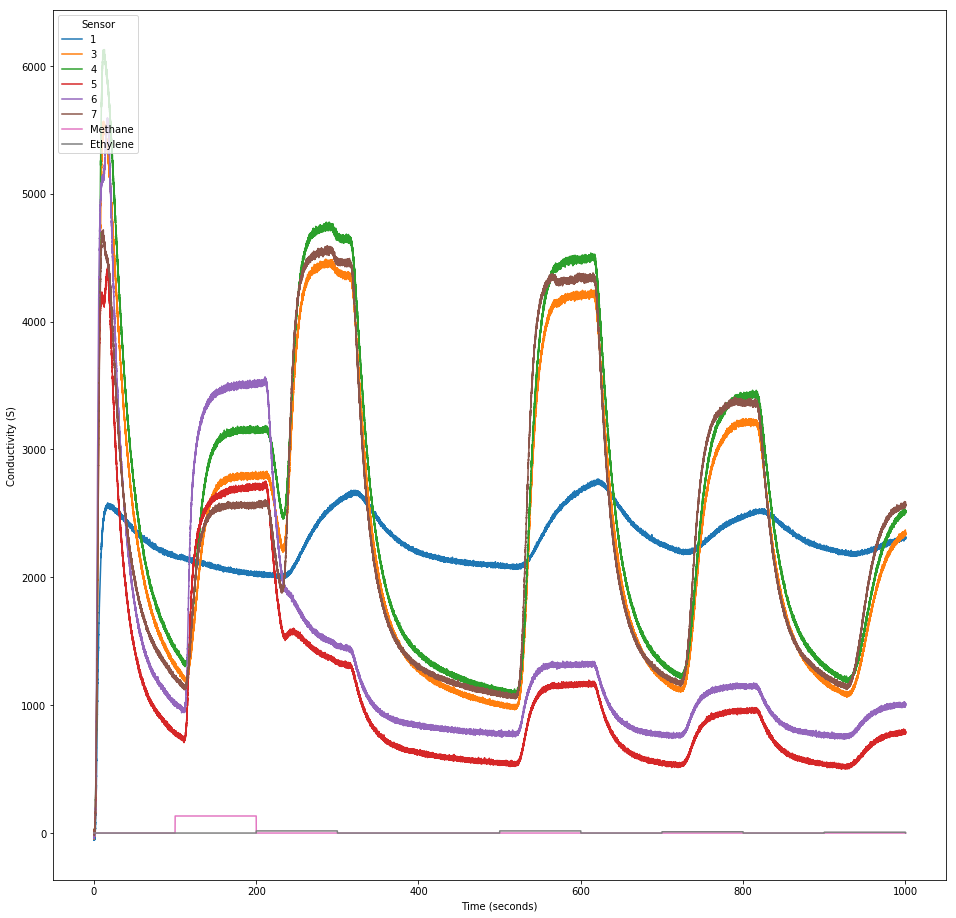

In [30]:
plt.figure(figsize=(16,16))
a = np.arange(100000)
plt.plot(df2['Time'][a], df['1'][a])
plt.plot(df2['Time'][a], df['3'][a])
plt.plot(df2['Time'][a], df['4'][a])
plt.plot(df2['Time'][a], df['5'][a])
plt.plot(df2['Time'][a], df['6'][a])
plt.plot(df2['Time'][a], df['7'][a])
plt.plot(df2['Time'][a], df['Methane'][a])
plt.plot(df2['Time'][a], df['Ethylene'][a])

plt.xlabel('Time (seconds)')
plt.ylabel('Conductivity (S)')
# plt.axis(xmin=0, xmax=1000)
plt.legend(loc='upper left', title ="Sensor")


In [6]:
from sklearn.preprocessing import StandardScaler

x2 = StandardScaler().fit(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
x2 = x2.transform(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values)
ym2 = df3['Methane Bin'].values.reshape(-1,1)
ye2 = df3['Ethylene Bin'].values.reshape(-1,1)
y2 = np.concatenate((ym2, ye2), axis=1)
x2_train, x2_test, ym2_train, ym2_test, ye2_train, ye2_test= train_test_split(x2, ym2, ye2, test_size=0.50, random_state=42)


In [67]:
ymtest_pred_lda = lda.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_lda = lda.fit(x2_train, ye2_train).predict(x2_test)

print("Ethylene LDA Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_lda)))
print("Methane LDA Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_lda)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ethylene LDA Accuracy = 0.9390203784822619
Methane LDA Accuracy = 0.9044925771383171


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

ymtest_pred_qda = qda.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_qda = qda.fit(x2_train, ye2_train).predict(x2_test)

print("Ethylene QDA Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_qda)))
print("Methane QDA Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_qda)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ethylene QDA Accuracy = 0.9295770786802177
Methane QDA Accuracy = 0.8857002422024843


In [58]:
import sklearn.linear_model as sk_lm
lr = sk_lm.LogisticRegression(solver='newton-cg', multi_class='ovr', n_jobs=1) 


ymtest_pred_lr = lr.fit(x2_train, ym2_train).predict(x2_test)
yetest_pred_lr = lr.fit(x2_train, ye2_train).predict(x2_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym2_test, ymtest_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye2_test, yetest_pred_lr)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:422: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The l

Ethylene Logistic Regression Accuracy = 0.9436306902674616
Methane Logistic Regression Accuracy = 0.9125526872163644


<br>
<br>
<br>

Cross validation analysis

In [79]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold

kf2 = KFold(n_splits = 2)
kf5 = KFold(n_splits = 5)
k2_acc = cvs(lda, x2, ym2, cv = kf2, scoring = "accuracy")
k5_acc = cvs(lda, x2, ym2, cv = kf5, scoring = "accuracy")

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [80]:
print("Model accuracy running cross validation with two k-folds:", k2_acc)
print("Model accuracy running cross validation with five k-folds:", k5_acc)

Model accuracy running cross validation with two k-folds: [0.94563814 0.93257768]
Model accuracy running cross validation with five k-folds: [0.94564393 0.9347061  0.92965741 0.94249977 0.94102681]


Given similar results of the cross validations, we will use half the data for training for model development.

<br>
<br>
<br>

## PCA
<br>
Methane

In [14]:
sc =  StandardScaler()
sc.fit(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])
a = sc.transform(df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])

In [15]:
ind=df3.index
ind

RangeIndex(start=20000, stop=4178504, step=1)

In [16]:
dft = pd.DataFrame(a,index=ind,columns=['1s','3s','4s','5s','6s','7s','8s','9s','10s','11s','12s','13s','14s','15s','16s'])


In [17]:
df4 = pd.concat([df3,dft],axis=1)

In [18]:
x = df4[['1s','3s','4s','5s','6s','7s','8s','9s','10s','11s','12s','13s','14s','15s','16s']]
y_meth = df4['Methane Bin']
y_ethy = df4['Ethylene Bin']


x_train, x_test, y_train, y_test = train_test_split(x, y_meth, test_size=0.50, random_state=42)

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y_ethy, test_size=0.50, random_state=42)

In [12]:
pca = PCA()
pca.fit(x_train)
print(pca.explained_variance_ratio_)

[7.10582032e-01 2.48628804e-01 3.54876889e-02 2.37563934e-03
 2.22931088e-03 3.16522677e-04 1.85311710e-04 6.85625441e-05
 4.67111025e-05 2.57876637e-05 2.04403337e-05 1.28335337e-05
 1.07528499e-05 5.52821673e-06 4.07449337e-06]


In [13]:
a=np.cumsum(pca.explained_variance_ratio_)

In [14]:
a

array([0.71058203, 0.95921084, 0.99469852, 0.99707416, 0.99930347,
       0.99962   , 0.99980531, 0.99987387, 0.99992058, 0.99994637,
       0.99996681, 0.99997964, 0.9999904 , 0.99999593, 1.        ])

In [15]:
x_train_pca = pca.transform(x_train)
x_train_pca.shape

(2079252, 15)

In [16]:
x_test_pca = pca.transform(x_test)
x_test_pca.shape
y_train.shape

(2079252,)

In [17]:
mse = []
for i in range(1,16,1):
    pred = lr.fit(x_train_pca[:,:i], y_train.values.reshape(-1,1)).predict(x_test_pca[:,:i])
    mse.append(sm.accuracy_score(y_test, pred))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

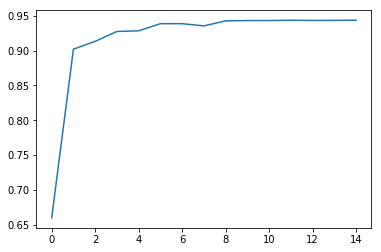

In [18]:
plt.plot(mse)

In [19]:
mse

[0.6598791296100713,
 0.902146541159994,
 0.9133539368965378,
 0.9275335553362459,
 0.9284988063014968,
 0.9387096898307661,
 0.9387457604946394,
 0.9355474949645354,
 0.9427606658548363,
 0.9432387223867045,
 0.9432569981897336,
 0.9436330949783864,
 0.943381562215643,
 0.9434926598603729,
 0.9436619515094852]

Text(0.5, 1.0, 'PC3')

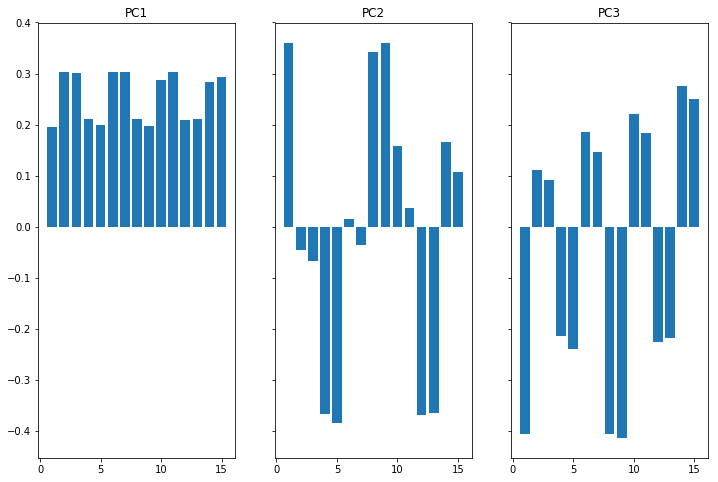

In [20]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,8))
ax1.bar(range(1,16,1),pca.components_[0])
ax1.set_title('PC1')
ax2.bar(range(1,16,1),pca.components_[1])
ax2.set_title('PC2')
ax3.bar(range(1,16,1),pca.components_[2])
ax3.set_title('PC3')

<br>
<br>

Ethylene

In [21]:
pca2 = PCA()
pca2.fit(x_train_2)
print(pca2.explained_variance_ratio_)
x_train_pca2 = pca2.transform(x_train_2)
x_train_pca2.shape

[7.10582032e-01 2.48628804e-01 3.54876889e-02 2.37563934e-03
 2.22931088e-03 3.16522677e-04 1.85311710e-04 6.85625441e-05
 4.67111025e-05 2.57876637e-05 2.04403337e-05 1.28335337e-05
 1.07528499e-05 5.52821673e-06 4.07449337e-06]


(2079252, 15)

In [22]:
x_test_pca2 = pca2.transform(x_test_2)
x_test_pca2.shape

(2079252, 15)

In [23]:
accur = []
for i in range(1,16,1):
    pred2 = lr.fit(x_train_pca2[:,:i], y_train_2.values.reshape(-1,1)).predict(x_test_pca2[:,:i])
    accur.append(sm.accuracy_score(y_test_2, pred2))

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 

[0.7362532295267721,
 0.8362872802334685,
 0.8693005946369176,
 0.8809244863056522,
 0.8805503132857393,
 0.8771207145646608,
 0.8891976537716448,
 0.9078774482361927,
 0.9106370944935968,
 0.9112103775780905,
 0.9115316469576559,
 0.9116446683711258,
 0.9114792242594933,
 0.9119587236179164,
 0.9124920885010571]

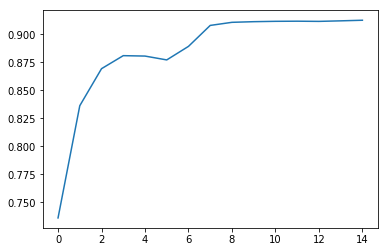

In [24]:
plt.plot(accur)
accur

In [25]:
pca2.components_.shape

(15, 15)

In [26]:
pca2.components_[0]

array([0.19523402, 0.30292301, 0.30179372, 0.21055388, 0.1985983 ,
       0.30293734, 0.30321912, 0.21029307, 0.19785115, 0.28660899,
       0.30241017, 0.20866237, 0.21184555, 0.2828343 , 0.29355776])

Text(0.5, 1.0, 'PC3')

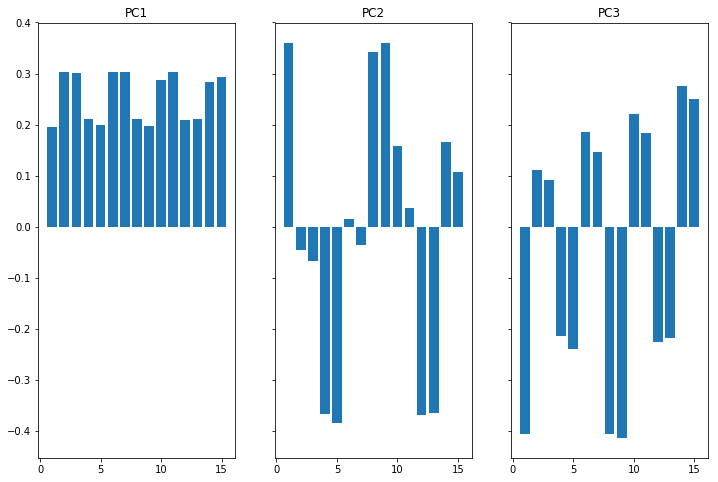

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(12,8))
ax1.bar(range(1,16,1),pca2.components_[0])
ax1.set_title('PC1')
ax2.bar(range(1,16,1),pca2.components_[1])
ax2.set_title('PC2')
ax3.bar(range(1,16,1),pca2.components_[2])
ax3.set_title('PC3')

from both of these plots it is evident that sensor TSG2600 and TSG2620 are more important

<br>
<br>
<br>
<br>
<br>

## Feature extraction

Extracting rolling or moving average

In [19]:
l = []
lda = LinearDiscriminantAnalysis(solver='svd')
for i in np.arange(3,20,1):
    x = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].rolling(i).mean()
    x = x[20:]
    y = df3['Ethylene Bin'][20:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
    
    lda.fit(x_train, y_train.values.reshape(-1,1))
    LDA_test_pred = lda.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, LDA_test_pred).ravel()
    l.append(fp+fn)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [61]:
print(l)
print(min(l))

[196873, 196735, 196628, 196546, 196536, 196518, 196542, 196547, 196580, 196583, 196584, 196626, 196621, 196608, 196601, 196640, 196675]
196518


optimal window = 8

In [63]:
m = []
lda = LinearDiscriminantAnalysis(solver='svd')
for i in np.arange(.1,1.1,.1):
    x = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].ewm(alpha=i).mean() 
    x = x[10:]
    y = df3['Ethylene Bin'][10:]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)
    
    lda.fit(x_train, y_train.values.reshape(-1,1))
    LDA_test_pred = lda.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, LDA_test_pred).ravel()
    m.append(fp+fn)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [64]:
print(m)
print(min(m))


[196580, 196354, 196374, 196520, 196743, 196956, 197239, 197512, 197865, 198280]
196354


optimal alpha = .3

In [7]:
#Rolling averages with window=8

win = 8
rollm = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].rolling(win).mean()
rollm.rename({'1':'1avg','3':'3avg','4':'4avg','5':'5avg','6':'6avg','7':'7avg','8':'8avg','9':'9avg','10':'10avg','11':'11avg','12':'12avg','13':'13avg','14':'14avg','15':'15avg','16':'16avg'}, axis='columns', inplace=True)
df3 = pd.concat([df3,rollm],axis=1)

In [8]:
#Exponential weighted average with alpha = .3

ex = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].ewm(alpha=.3).mean()
ex.rename({'1':'1ex','3':'3ex','4':'4ex','5':'5ex','6':'6ex','7':'7ex','8':'8ex','9':'9ex','10':'10ex','11':'11ex','12':'12ex','13':'13ex','14':'14ex','15':'15ex','16':'16ex'}, axis='columns', inplace=True)
df3 = pd.concat([df3,ex],axis=1)

<br>
<br>
<br>
Extracing first and second derivative terms

In [22]:
#first derivative

der = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].diff(8)/8
der.rename({'1':'1der','3':'3der','4':'4der','5':'5der','6':'6der','7':'7der','8':'8der','9':'9der','10':'10der','11':'11der','12':'12der','13':'13der','14':'14der','15':'15der','16':'16der'}, axis='columns', inplace=True)
df3 = pd.concat([df3,der],axis=1)

In [23]:
#second derivative

der2 = df3[['1der','3der','4der','5der','6der','7der','8der','9der','10der','11der','12der','13der','14der','15der','16der']].diff(8)/8
der2.rename({'1der':'1der2','3der':'3der2','4der':'4der2','5der':'5der2','6der':'6der2','7der':'7der2','8der':'8der2','9der':'9der2','10der':'10de2r','11der':'11der2','12der':'12der2','13der':'13der2','14der':'14der2','15der':'15der2','16der':'16der2'}, axis='columns', inplace=True)
df3 = pd.concat([df3,der2],axis=1)
df3.dropna(inplace=True)

<br>
<br>
<br>
<br>

## Performance of fine-tuned features

In [11]:
x5 =df3.drop(['Time','Methane','Ethylene','Methane Bin','Ethylene Bin'],axis=1)
ym5 = df3['Methane Bin']
ye5 = df3['Ethylene Bin']

x5_train, x5_test, ym5_train, ym5_test, ye5_train, ye5_test = train_test_split(x5, ym5, ye5, test_size=0.50, random_state=42)

<br>
<br>
LDA with added features

In [14]:
ym5test_pred_lda = lda.fit(x5_train, ym5_train).predict(x5_test)
ye5test_pred_lda = lda.fit(x5_train, ye5_train).predict(x5_test)
print("Ethylene LDA Accuracy = {}".format(sm.accuracy_score(ym5_test, ym5test_pred_lda)))
print("Methane LDA Accuracy = {}".format(sm.accuracy_score(ye5_test, ye5test_pred_lda)))


Ethylene LDA Accuracy = 0.9411863157955488
Methane LDA Accuracy = 0.9060610491120811


In [40]:
print("LDA Ethylene model confusion matrix")
print(cr(ye5_test, ye5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ye5_test, ye5test_pred_lda).ravel()
ce_lda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(ce_lda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

LDA Ethylene model confusion matrix
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1178361
           1       0.92      0.86      0.89    900883

   micro avg       0.91      0.91      0.91   2079244
   macro avg       0.91      0.90      0.90   2079244
weighted avg       0.91      0.91      0.91   2079244



,True yes,True no
Pred yes,776086,70525
Pred no,124797,1107836


In [39]:
print("LDA Methane model confusion matrix")
print(cr(ym5_test, ym5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ym5_test, ym5test_pred_lda).ravel()
cm_lda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(cm_lda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

LDA Methane model confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.94      0.95   1159945
           1       0.93      0.94      0.93    919299

   micro avg       0.94      0.94      0.94   2079244
   macro avg       0.94      0.94      0.94   2079244
weighted avg       0.94      0.94      0.94   2079244



,True yes,True no
Pred yes,863602,66591
Pred no,55697,1093354


<br>
<br>
QDA with added features

In [16]:
ym5test_pred_qda = qda.fit(x5_train, ym5_train).predict(x5_test)
ye5test_pred_qda = qda.fit(x5_train, ye5_train).predict(x5_test)

print("Ethylene QDA Accuracy = {}".format(sm.accuracy_score(ym5_test, ym5test_pred_qda)))
print("Methane QDA Accuracy = {}".format(sm.accuracy_score(ye5_test, ye5test_pred_qda)))


Ethylene QDA Accuracy = 0.9327039058427005
Methane QDA Accuracy = 0.8911695789431159


In [38]:
print("QDA Ethylene model confusion matrix")
print(cr(ye5_test, ye5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ye5_test, ye5test_pred_lda).ravel()
ce_qda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(ce_qda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

QDA Ethylene model confusion matrix
              precision    recall  f1-score   support

           0       0.90      0.94      0.92   1178361
           1       0.92      0.86      0.89    900883

   micro avg       0.91      0.91      0.91   2079244
   macro avg       0.91      0.90      0.90   2079244
weighted avg       0.91      0.91      0.91   2079244



,True yes,True no
Pred yes,776086,70525
Pred no,124797,1107836


In [37]:
print("QDA Methane model confusion matrix")
print(cr(ym5_test, ym5test_pred_lda))
tn, fp, fn, tp = confusion_matrix(ym5_test, ym5test_pred_lda).ravel()
cm_qda = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(cm_qda,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

QDA Methane model confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.94      0.95   1159945
           1       0.93      0.94      0.93    919299

   micro avg       0.94      0.94      0.94   2079244
   macro avg       0.94      0.94      0.94   2079244
weighted avg       0.94      0.94      0.94   2079244



,True yes,True no
Pred yes,863602,66591
Pred no,55697,1093354


<br>
<br>
Logistic Regression with added features

In [17]:
ym5test_pred_lr = lr.fit(x5_train, ym5_train).predict(x5_test)
ye5test_pred_lr = lr.fit(x5_train, ye5_train).predict(x5_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym5_test, ym5test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye5_test, ye5test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Ethylene Logistic Regression Accuracy = 0.9452156649243667
Methane Logistic Regression Accuracy = 0.9164176979709933


In [35]:
print("Logistic Regression Ethylene model confusion matrix")
print(cr(ye5_test, ye5test_pred_lr))
tn, fp, fn, tp = confusion_matrix(ye5_test, ye5test_pred_lr).ravel()
ce_lr = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(ce_lr,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

Logistic Regression Ethylene model confusion matrix
              precision    recall  f1-score   support

           0       0.91      0.95      0.93   1178361
           1       0.93      0.88      0.90    900883

   micro avg       0.92      0.92      0.92   2079244
   macro avg       0.92      0.91      0.91   2079244
weighted avg       0.92      0.92      0.92   2079244



,True yes,True no
Pred yes,789741,62646
Pred no,111142,1115715


In [36]:
print("Logistic Regression Methane model confusion matrix")
print(cr(ym5_test, ym5test_pred_lr))
tn, fp, fn, tp = confusion_matrix(ym5_test, ym5test_pred_lr).ravel()
cm_lr = np.array([tp,fp,fn,tn]).reshape((2,2))
pd.DataFrame(cm_lr,columns= ['True yes','True no'],index=['Pred yes','Pred no'])

Logistic Regression Methane model confusion matrix
              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1159945
           1       0.94      0.94      0.94    919299

   micro avg       0.95      0.95      0.95   2079244
   macro avg       0.94      0.94      0.94   2079244
weighted avg       0.95      0.95      0.95   2079244



,True yes,True no
Pred yes,862257,56868
Pred no,57042,1103077


<br>
<br>

## Optimizing Features 

In [13]:
#Using Rolling Average features
x6 = df3[['1avg','3avg','4avg','5avg','6avg','7avg','8avg','9avg','10avg','11avg','12avg','13avg','14avg','15avg','16avg']]
ym6 = df3['Methane Bin']
ye6 = df3['Ethylene Bin']

x6_train, x6_test, ym6_train, ym6_test, ye6_train, ye6_test = train_test_split(x6, ym6, ye6, test_size=0.50, random_state=42)


In [14]:
ym6test_pred_lr = lr.fit(x6_train, ym6_train).predict(x6_test)
ye6test_pred_lr = lr.fit(x6_train, ye6_train).predict(x6_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym6_test, ym6test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye6_test, ye6test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

Ethylene Logistic Regression Accuracy = 0.9444148931053787
Methane Logistic Regression Accuracy = 0.9160839228104061


In [15]:
#Using only Exponential Averaging
x7 = df3[['1ex','3ex','4ex','5ex','6ex','7ex','8ex','9ex','10ex','11ex','12ex','13ex','14ex','15ex','16ex']]
ym7 = df3['Methane Bin']
ye7 = df3['Ethylene Bin']

x7_train, x7_test, ym7_train, ym7_test, ye7_train, ye7_test = train_test_split(x7, ym7, ye7, test_size=0.50, random_state=42)


In [16]:
ym7test_pred_lr = lr.fit(x7_train, ym7_train).predict(x7_test)
ye7test_pred_lr = lr.fit(x7_train, ye7_train).predict(x7_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym7_test, ym7test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye7_test, ye7test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Ethylene Logistic Regression Accuracy = 0.9444057551687055
Methane Logistic Regression Accuracy = 0.9158020896056451


In [19]:
#First Derivative
x8 = df3[['1der','3der','4der','5der','6der','7der','8der','9der','10der','11der','12der','13der','14der','15der','16der']]
ym8 = df3['Methane Bin']
ye8 = df3['Ethylene Bin']

x8_train, x8_test, ym8_train, ym8_test, ye8_train, ye8_test = train_test_split(x8, ym8, ye8, test_size=0.50, random_state=42)


In [20]:
ym8test_pred_lr = lr.fit(x8_train, ym8_train).predict(x8_test)
ye8test_pred_lr = lr.fit(x8_train, ye8_train).predict(x8_test)

print("Ethylene Logistic Regression Accuracy = {}".format(sm.accuracy_score(ym8_test, ym8test_pred_lr)))
print("Methane Logistic Regression Accuracy = {}".format(sm.accuracy_score(ye8_test, ye8test_pred_lr)))


/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Ethylene Logistic Regression Accuracy = 0.5875890467881596
Methane Logistic Regression Accuracy = 0.5837963221247723


<br>
<br>
<br>

## Sensor Drift

In [21]:
x = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values.reshape(-1,1)
yE = df3['Ethylene Bin']
yM = df3['Methane Bin']
x_train = x[:500000]
l = [x[500000:600000],x[600000:700000],x[700000:800000],x[800000:900000],x[1000000:1100000],x[1100000:1200000],x[1200000:1300000],x[1300000:1400000],x[1400000:1500000],x[1600000:1700000],x[1800000:1900000],x[2000000:2100000],x[2100000:2200000],x[2200000:2300000],x[2300000:2400000],x[2400000:2500000],x[2500000:2600000],x[2600000:2700000],x[2700000:2800000],x[2800000:2900000],x[2900000:3000000],x[3000000:3100000],x[3100000:3200000],x[3200000:3300000],x[3300000:3400000],x[3400000:3500000],x[3500000:3600000],x[3600000:3700000],x[3700000:3800000],x[3800000:3900000]]
m = [yE[500000:600000],yE[600000:700000],yE[700000:800000],yE[800000:900000],yE[900000:1000000],yE[1000000:1100000],yE[1100000:1200000],yE[1200000:1300000],yE[1300000:1400000],yE[1400000:1500000],yE[1600000:1700000],yE[1800000:1900000],yE[2000000:2100000],yE[2100000:2200000],yE[2200000:2300000],yE[2300000:2400000],yE[2400000:2500000],yE[2500000:2600000],yE[2600000:2700000],yE[2700000:2800000],yE[2800000:2900000],yE[2900000:3000000],yE[3000000:3100000],yE[3100000:3200000],yE[3200000:3300000],yE[3300000:3400000],yE[3400000:3500000],yE[3500000:3600000],yE[3600000:3700000],yE[3700000:3800000],yE[3800000:3900000]]
n = [yM[500000:600000],yM[600000:700000],yM[700000:800000],yM[800000:900000],yM[900000:1000000],yM[1000000:1100000],yM[1100000:1200000],yM[1200000:1300000],yM[1300000:1400000],yM[1400000:1500000],yM[1600000:1700000],yM[1800000:1900000],yM[2000000:2100000],yM[2100000:2200000],yM[2200000:2300000],yM[2300000:2400000],yM[2400000:2500000],yM[2500000:2600000],yM[2600000:2700000],yM[2700000:2800000],yM[2800000:2900000],yM[2900000:3000000],yM[3000000:3100000],yM[3100000:3200000],yM[3200000:3300000],yM[3300000:3400000],yM[3400000:3500000],yM[3500000:3600000],yM[3600000:3700000],yM[3700000:3800000],yM[3800000:3900000]]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

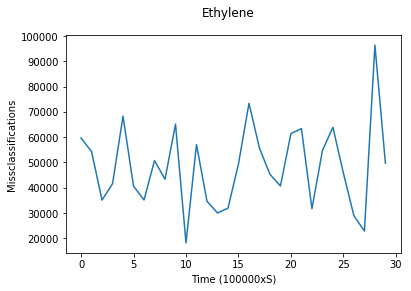

In [45]:
nn = []
y_train = yE[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))
for index,val in enumerate(l):
    LDA_test_pred = lda.predict(val)
    tn, fp, fn, tp = confusion_matrix(m[index], LDA_test_pred).ravel()
    nn.append(fn + fp) 
plt.figure()
plt.plot(nn)
plt.suptitle('Ethylene')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

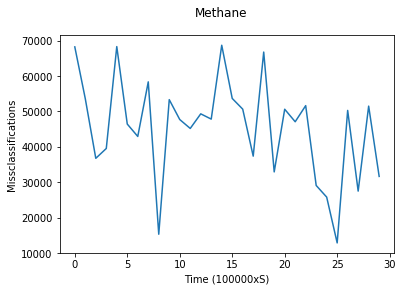

In [47]:
o = []
y_train = yM[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))
for index,val in enumerate(l):
    LDA_test_pred = lda.predict(val)
    tn, fp, fn, tp = confusion_matrix(n[index], LDA_test_pred).ravel()
    o.append(fn + fp)
plt.figure()
plt.plot(o)
plt.suptitle('Methane')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

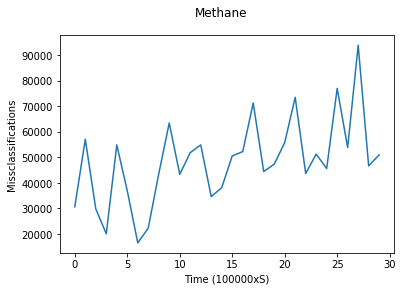

In [50]:
#analysing drift of one sensor
x = df3['3'].values.reshape(-1,1)
x_train = x[:500000]
l = [x[500000:600000],x[600000:700000],x[700000:800000],x[800000:900000],x[1000000:1100000],x[1100000:1200000],x[1200000:1300000],x[1300000:1400000],x[1400000:1500000],x[1600000:1700000],x[1800000:1900000],x[2000000:2100000],x[2100000:2200000],x[2200000:2300000],x[2300000:2400000],x[2400000:2500000],x[2500000:2600000],x[2600000:2700000],x[2700000:2800000],x[2800000:2900000],x[2900000:3000000],x[3000000:3100000],x[3100000:3200000],x[3200000:3300000],x[3300000:3400000],x[3400000:3500000],x[3500000:3600000],x[3600000:3700000],x[3700000:3800000],x[3800000:3900000]]

r = []
y_train = yM[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))
for index,val in enumerate(l):
    LDA_test_pred = lda.predict(val)
    tn, fp, fn, tp = confusion_matrix(n[index], LDA_test_pred).ravel()
    r.append(fn + fp)
plt.figure()
plt.plot(r)
plt.suptitle('Methane')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Missclassifications')

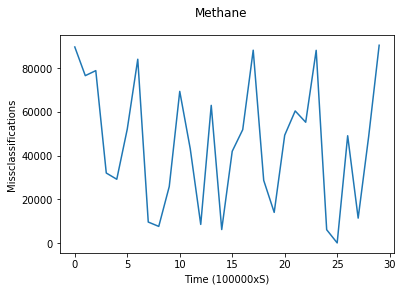

In [23]:
jj = []
y_train = yM[:500000]
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(x_train, y_train.values.reshape(-1,1))

for index,val in enumerate(l):
    LDA_prob = lda.predict_proba(val)
    cp_arr=[]
    for ind, arr in enumerate(LDA_prob):
        if arr[1] > (0.5 + ind*.00001):
            cp_arr.append(1)
        else:
            cp_arr.append(0)
    tn, fp, fn, tp = confusion_matrix(n[index], cp_arr).ravel()
    jj.append(fn + fp) 
    
    
plt.plot(jj)
plt.suptitle('Methane')
plt.xlabel('Time (100000xS)')
plt.ylabel('Missclassifications')

<br>
<br>
<br>
<br>

## Linear Regression 



In [9]:
x1 = df[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
ym1 = df['Methane'].values.reshape(-1,1)
ye1 = df['Ethylene'].values.reshape(-1,1)
y1 = np.concatenate((ym1, ye1), axis=1)

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.50, random_state=42)

df2 = df.drop(columns='2')
df3 = df2[20000:]

x2 = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].values
ym2 = df3['Methane'].values.reshape(-1,1)
ye2 = df3['Ethylene'].values.reshape(-1,1)
y2 = np.concatenate((ym2, ye2), axis=1)
x2_train, x2_test, ym2_train, ym2_test= train_test_split(x2, ym2, test_size=0.50, random_state=42)


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()


p_order = np.arange(1, 4)
kf = KFold(n_splits = 2)
scores = []

#first order
poly=pf(1)
poly_train_eq = poly.fit_transform(x2_train)
score = cvs(LR, poly_train_eq, ym2_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
scores.append(-score)
print(scores)


[1799.7136643636916]


In [33]:
poly_test_eq = poly.fit_transform(x2_test)
LR.fit(poly_train_eq, ym2_train)
LR_pred1 = LR.predict(poly_test_eq)

(2000000, 2000100)

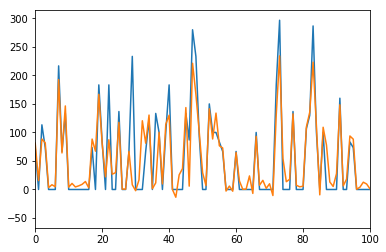

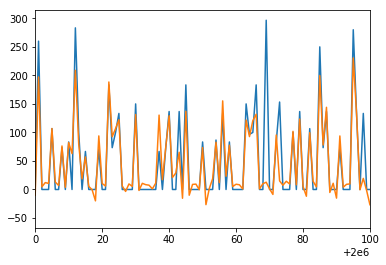

In [34]:
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(0, 100)
plt.figure()
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(2000000, 2000100)

In [35]:
#second order

poly=pf(2)
poly_train_eq2 = poly.fit_transform(x2_train)
score = cvs(LR, poly_train_eq2, ym2_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
scores.append(-score)
print(scores)

[1799.7136643636916, 1546.9880981978872]


In [36]:
poly_test_eq2 = poly.fit_transform(x2_test)
LR.fit(poly_train_eq2, ym2_train)
LR_pred2 = LR.predict(poly_test_eq2)

(2000000, 2000010)

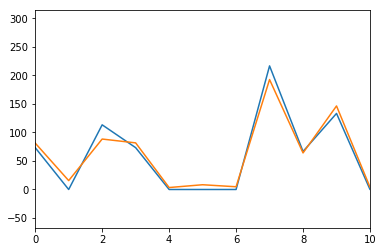

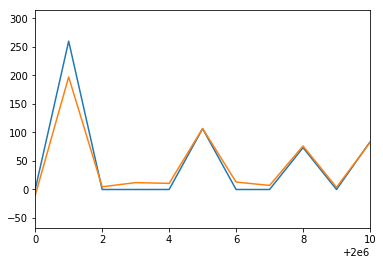

In [37]:
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(0, 10)
plt.figure()
plt.plot(ym2_test)
plt.plot(LR_pred1)
plt.xlim(2000000, 2000010)

**Polynomial fit with rolling average**

In [11]:
win = 8
rollm = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].rolling(win).mean()
rollm.rename({'1':'1avg','3':'3avg','4':'4avg','5':'5avg','6':'6avg','7':'7avg','8':'8avg','9':'9avg','10':'10avg','11':'11avg','12':'12avg','13':'13avg','14':'14avg','15':'15avg','16':'16avg'}, axis='columns', inplace=True)
df3 = pd.concat([df3,rollm],axis=1)

ex = df3[['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']].ewm(alpha=.3).mean()
ex.rename({'1':'1ex','3':'3ex','4':'4ex','5':'5ex','6':'6ex','7':'7ex','8':'8ex','9':'9ex','10':'10ex','11':'11ex','12':'12ex','13':'13ex','14':'14ex','15':'15ex','16':'16ex'}, axis='columns', inplace=True)
df3 = pd.concat([df3,ex],axis=1)

In [12]:
x4 = df3[['1ex','3ex','4ex','5ex','6ex','7ex','8ex','9ex','10ex','11ex','12ex','13ex','14ex','15ex','16ex']].values
x4=x4[8:]
ym4=ym2[8:]
ye4=ye2[8:]
x4_train, x4_test, ym4_train, ym4_test= train_test_split(x4, ym4, test_size=0.50, random_state=42)

In [44]:
scores = []

#first order
poly=pf(1)
poly_train_eq = poly.fit_transform(x4_train)
score = cvs(LR, poly_train_eq, ym4_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
scores.append(-score)
print(scores)

[1722.3304399872122]


In [14]:
normscores= []
poly=pf(2)
poly_train_eq2 = poly.fit_transform(x4_train)
score = cvs(LR, poly_train_eq2, ym4_train, cv = kf, scoring = 'neg_mean_squared_error').mean()
normscores.append(-score)
print(normscores)

[1454.0377145917487]


In [15]:
poly_test_eq = poly.fit_transform(x4_test)
LR.fit(poly_train_eq2, ym4_train)
LR_pred1 = LR.predict(poly_test_eq)

(2000000, 2000010)

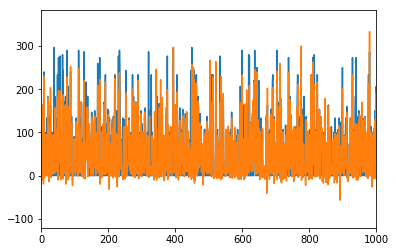

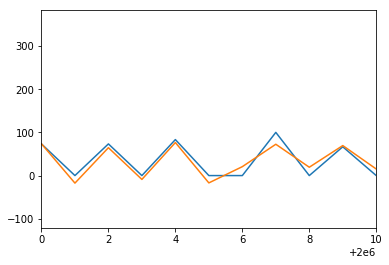

In [31]:
plt.plot(ym4_test)
plt.plot(LR_pred1)
plt.xlim(0, 1000)
plt.figure()
plt.plot(ym4_test)
plt.plot(LR_pred1)
plt.xlim(2000000, 2000010)

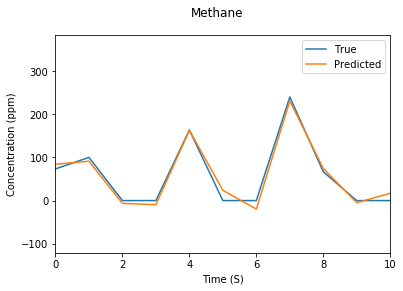

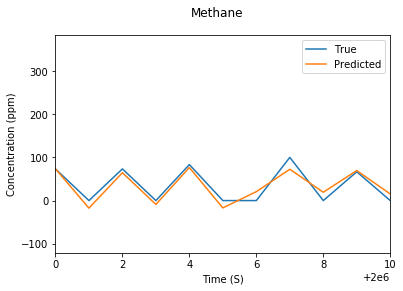

In [19]:
plt.plot(ym4_test, label="True")
plt.plot(LR_pred1, label = "Predicted")
plt.xlim(0, 10)
plt.suptitle('Methane')
plt.xlabel('Time (S)')
plt.ylabel('Concentration (ppm)')
plt.legend(loc='upper right')
plt.figure()



plt.plot(ym4_test, label = "True")
plt.plot(LR_pred1, label = "Predicted")
plt.xlim(2000000, 2000010)
plt.suptitle('Methane')
plt.xlabel('Time (S)')
plt.ylabel('Concentration (ppm)')
plt.legend(loc='upper right')

In [1]:
import sys
sys.path

['C:\\Users\\Ray\\Desktop\\Ray_macbook\\EE257\\RDomingos_BPerez',
 'C:\\Users\\Ray\\anaconda3\\python39.zip',
 'C:\\Users\\Ray\\anaconda3\\DLLs',
 'C:\\Users\\Ray\\anaconda3\\lib',
 'C:\\Users\\Ray\\anaconda3',
 '',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Ray\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Ray\\.ipython']